**Processamento Digital de Imagens - 2022/01**<br/>
**Engenharia da Computação**<br/>
**Aluno:** Gabriel Soares Baptista, 2018102117<br/>

### Questão 1

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

### Funções auxiliares

In [22]:
def get_theta(r: int, g: int, b: int) -> np.float32:
    '''
    Retorna o ângulo theta utilizado na conversão de RGB para
    HSI, note que o valor de retorno é em graus e não em 
    radianos.
    '''
    num = 0.5*((r-g) + (r-b))
    den = ((r-g)**2 + (r-b)*(g-b))**0.5

    if den > 0:
        return np.rad2deg(np.arccos(num / den))
    else:
        return 90


def rgb_to_hsi(image: np.array) -> np.array:
    '''
    Converte a imagem informada de RGB para HSI, isto é, cada
    valor de pixel na imagem de retorno irá representar as
    componentes HSI normalizadas (no intervalo [0, 1]).
    '''
    hsi_image = []

    for row in image:
        new_row = []

        for pixel in row:
            r, g, b = pixel

            # normaliza os valores
            r /= 255
            g /= 255
            b /= 255

            # pega as componentes hsi
            theta = get_theta(r, g, b)
            h = theta if b <= g else 360 - theta
            h /= 360
            if (r == 0 and g == 0 and b == 0):
                s = 1
            else:
                s = 1 - (3/(r+g+b)) * np.min([r, g, b])
            i = (r+g+b)/3

            new_row.append([h, s, i])
        hsi_image.append(new_row)

    return np.array(hsi_image, dtype=np.float32)


def hsi_to_rgb(image: np.array) -> np.array:
    '''
    Converte a imagem informada de HSI para RGB, isto é, cada
    valor de pixel na imagem de retorno irá representar as
    componentes RGB (já no intervalo [0, 255]).
    '''
    rgb_image = []

    for row in image:
        new_row = []

        for pixel in row:
            h, s, i = pixel

            # volta o ângulo para o intervalo [0, 360]
            h *= 360

            # encontra o setor pelo ângulo
            if 0 <= h < 120:
                b = i*(1 - s)
                r = i*(1 + (s*np.cos(np.deg2rad(h)))/(np.cos(np.deg2rad(60 - h))))
                g = 3*i - (r + b)
            elif 120 <= h < 240:
                h -= 120
                r = i*(1 - s)
                g = i*(1 + (s*np.cos(np.deg2rad(h)))/(np.cos(np.deg2rad(60 - h))))
                b = 3*i - (r + g)
            else:
                h -= 240
                g = i*(1 - s)
                b = i*(1 + (s*np.cos(np.deg2rad(h)))/(np.cos(np.deg2rad(60 - h))))
                r = 3*i - (g + b)

            new_row.append([r * 255, g * 255, b * 255])
        rgb_image.append(new_row)

    return np.array(rgb_image, dtype=np.uint8)


def plot_comparision(
    img0: np.array,
    img1: np.array,
    titles: Tuple[str, str]) -> None:
    '''
    Plota uma comparação entre duas imagens.
    '''
    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img0, cmap='gray')
    axs[0].set_title(titles[0])
    axs[1].imshow(img1, cmap='gray')
    axs[1].set_title(titles[1])
    plt.show()


def plot_hsi(image: np.array) -> None:
    '''
    Imprime cada canal da imagem separadamente. Utilizada
    para mostrar cada componente HSI da imagem convertida.
    '''
    _, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image[:, :, 0], cmap='gray')
    axs[0].set_title('H channel')
    axs[1].imshow(image[:, :, 1], cmap='gray')
    axs[1].set_title('S channel')
    axs[2].imshow(image[:, :, 2], cmap='gray')
    axs[2].set_title('I channel')
    plt.show()

### Resolução

Primeiro lemos a imagem da Lena misturada com cores.

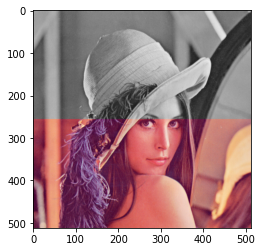

In [23]:
image = plt.imread('../images/mistura.tif')
plt.imshow(image)
plt.show()

Agora iremos converter a imagem para as componentes HSI e iremos plotar a imagem resultante, note que as componentes são tratadas como componentes RGB para a primeira plotagem, posteriormente, iremos mostrar cada componente HSI separadamente.

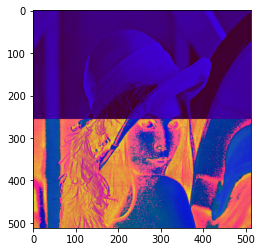

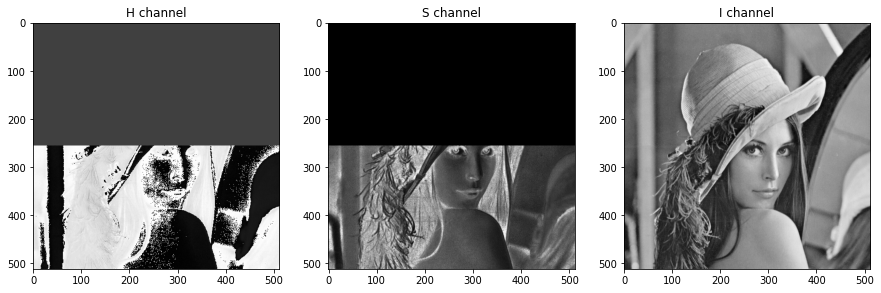

In [24]:
hsi_image = rgb_to_hsi(image)
plt.imshow(np.array(hsi_image * 255, dtype=np.uint8))
plot_hsi(hsi_image)
plt.show()

Também podemos observar uma comparação com a imagem original.

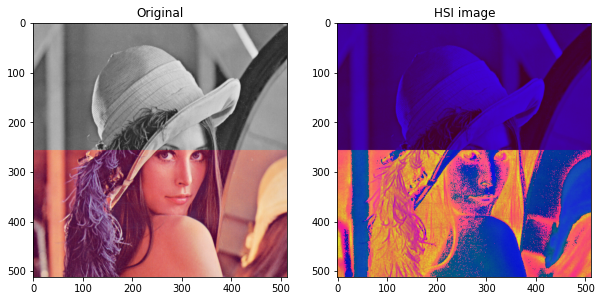

In [27]:
plot_comparision(
    image,
    np.array(hsi_image * 255, dtype=np.uint8),
    ('Original', 'HSI image')
)

Convertemos a imagem novamente para o domínio RGB e plotamos o resultado.

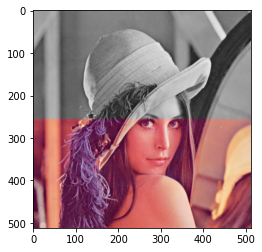

In [ ]:
rgb_image = hsi_to_rgb(hsi_image)
plt.imshow(rgb_image)
plt.show()

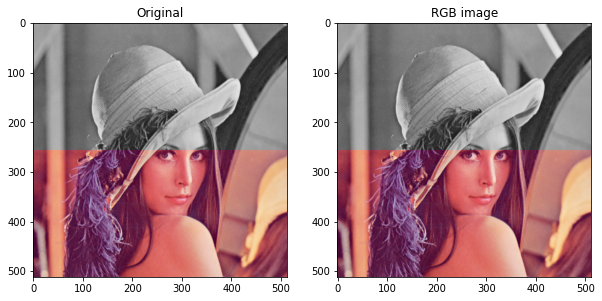

In [28]:
plot_comparision(
    image,
    rgb_image,
    ('Original', 'RGB image')
)

Como podemos ver a imagem está muito semelhante a imagem original, isto é, visualmente não possui alterações grotescas, entretanto, é esperado que existão pequenos erros de quantização devido ao erro numérico inerente dos computadores, principalmente pela representação de números ponto flutuante pela IEE 754.

Podemos ver essa diferença pela equação abaixo:

In [ ]:
print(f'Erro acumulado devido a representação numérica: '
      f'{(((image - rgb_image)**2)**0.5).sum()}')

Erro acumulado devido a representação numérica: 74225.0


A implementação não se trata de uma conta muito complexa, entretanto, existem alguns fatores que podem complicar sua elaboração, como os valores utilizados serem em grande maioria em graus, enquanto a biblioteca numpy trabalha primariamente com valores em radianos.

Outro problema observado são os possíveis valores de denominadores nulos, para contonar esse problema, foi preferido retornar diretamente o valor do ângulo para evitar eventuais problemas de aproximação numérica.